# import functions

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Install package for natural language processing
%pip install --quiet nltk

# data manipulation
import pandas as pd
import numpy as np
import os

# text analysis tools
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn import preprocessing
from nltk import SnowballStemmer
import string

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict

from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns

In [ ]:
pip install category_encoders

     |████████████████████████████████| 86 kB 4.0 MB/s 


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ads final project/survey.csv')

FileNotFoundError: ignored

# Exploratory data analysis

In [ ]:
data.shape[0]

1259

In [ ]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
nas = pd.DataFrame(data.isna().sum())

In [ ]:
print(nas.to_string())

                              0
Timestamp                     0
Age                           0
Gender                        0
Country                       0
state                       515
self_employed                18
family_history                0
treatment                     0
work_interfere              264
no_employees                  0
remote_work                   0
tech_company                  0
benefits                      0
care_options                  0
wellness_program              0
seek_help                     0
anonymity                     0
leave                         0
mental_health_consequence     0
phys_health_consequence       0
coworkers                     0
supervisor                    0
mental_health_interview       0
phys_health_interview         0
mental_vs_physical            0
obs_consequence               0
comments                   1095


In [ ]:
data.Country.unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand',
       'Zimbabwe', 'Spain', 'Finland', 'Uruguay', 'Israel',
       'Bosnia and Herzegovina', 'Hungary', 'Singapore', 'Japan',
       'Nigeria', 'Croatia', 'Norway', 'Thailand', 'Denmark',
       'Bahamas, The', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines'], dtype=object)

In [ ]:
us = data.loc[data.Country == 'United States']

In [ ]:
us.shape[0]

751

In [ ]:
us.isna().sum()

Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                         11
self_employed                 11
family_history                 0
treatment                      0
work_interfere               144
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments                     647
dtype: int64

**found state and self_employ have same nans, are they related**

In [ ]:
nans = us.loc[us.state.isna()]

In [ ]:
nans

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
52,2014-08-27 11:45:33,31,M,United States,NaN,No,No,No,NaN,100-500,...,Don't know,Maybe,Maybe,Some of them,Some of them,Maybe,Maybe,Don't know,No,NaN
294,2014-08-27 14:15:57,56,Male,United States,NaN,No,No,Yes,Never,More than 1000,...,Don't know,No,Maybe,Yes,Some of them,No,Maybe,Don't know,No,NaN
367,2014-08-27 15:13:33,36,Male,United States,NaN,No,Yes,Yes,Often,100-500,...,Very easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
525,2014-08-27 17:32:04,41,Female,United States,NaN,No,Yes,Yes,Rarely,500-1000,...,Very easy,Maybe,Maybe,Some of them,Some of them,No,No,Yes,No,NaN
574,2014-08-27 20:52:20,50,Male,United States,NaN,No,No,No,Never,26-100,...,Don't know,No,No,No,No,No,Maybe,No,No,NaN
596,2014-08-27 22:14:23,24,Female,United States,NaN,No,Yes,Yes,Sometimes,100-500,...,Somewhat difficult,Yes,Maybe,No,No,No,No,No,Yes,NaN
638,2014-08-28 03:13:10,35,Male,United States,NaN,Yes,No,No,NaN,1-5,...,Very easy,No,No,Some of them,Yes,No,No,Yes,No,NaN
817,2014-08-28 14:41:47,44,male,United States,NaN,Yes,Yes,Yes,Sometimes,1-5,...,Very easy,Yes,Yes,Some of them,No,No,No,Yes,No,NaN
854,2014-08-28 17:01:06,31,Male,United States,NaN,No,Yes,No,NaN,6-25,...,Don't know,Maybe,No,Some of them,Some of them,No,No,Don't know,No,NaN
926,2014-08-28 21:27:19,43,M,United States,NaN,No,Yes,No,Sometimes,500-1000,...,Don't know,Maybe,No,No,Some of them,No,Maybe,No,No,My employer gives access to basic counseling a...


**nans in state has nothing to do with self-employ laws**

In [ ]:
us.state.fillna(us.state.mode().tolist()[0],inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
us.self_employed.fillna(us.self_employed.mode().tolist()[0],inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
us.work_interfere.fillna(us.work_interfere.mode().tolist()[0],inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
us.isna().sum()

Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                          0
self_employed                  0
family_history                 0
treatment                      0
work_interfere                 0
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments                     647
dtype: int64

In [ ]:
comm = us.dropna()

In [ ]:
comm #prepare for nlop

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
13,2014-08-27 11:33:26,36,Male,United States,CT,No,Yes,No,Never,500-1000,...,Don't know,No,No,Yes,Yes,No,No,Don't know,No,I'm not on my company's health insurance which...
15,2014-08-27 11:34:00,29,female,United States,IL,No,Yes,Yes,Rarely,26-100,...,Somewhat easy,No,No,Yes,Some of them,Maybe,Maybe,Don't know,No,I have chronic low-level neurological issues t...
24,2014-08-27 11:36:48,33,male,United States,CA,No,Yes,Yes,Rarely,26-100,...,Don't know,No,No,Yes,Yes,No,Yes,Don't know,No,Relatively new job. Ask again later
25,2014-08-27 11:37:08,35,male,United States,TN,No,Yes,Yes,Sometimes,More than 1000,...,Very easy,Yes,No,Some of them,Yes,No,Yes,No,No,Sometimes I think about using drugs for my me...
33,2014-08-27 11:39:36,42,Male,United States,WA,No,Yes,Yes,Sometimes,26-100,...,Very easy,Maybe,No,Some of them,Some of them,Maybe,Yes,Don't know,No,I selected my current employer based on its po...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,2014-11-06 11:24:38,56,female,United States,OR,Yes,No,No,Rarely,1-5,...,Don't know,Maybe,Maybe,No,No,No,No,Don't know,No,I'm self-employed on contract with small start...
1190,2015-01-03 03:38:30,44,M,United States,OH,No,Yes,Yes,Sometimes,100-500,...,Don't know,Maybe,No,Some of them,Some of them,No,No,Don't know,No,My mental health issues were the direct result...
1219,2015-02-21 09:48:13,38,Male,United States,TX,No,No,Yes,Sometimes,More than 1000,...,Very easy,No,No,Yes,Yes,No,No,Don't know,No,I openly discuss my mental health struggles. I...
1221,2015-02-21 10:45:51,46,male,United States,MD,No,Yes,Yes,Sometimes,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,Just starting a new job hence the numerous I d...


# Feature engineering

In [ ]:
from category_encoders.ordinal import OrdinalEncoder

data_encoding = us
encoder = OrdinalEncoder()
data_encoding = encoder.fit_transform(us.drop(['Timestamp', 'comments', 'Age'], axis=1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


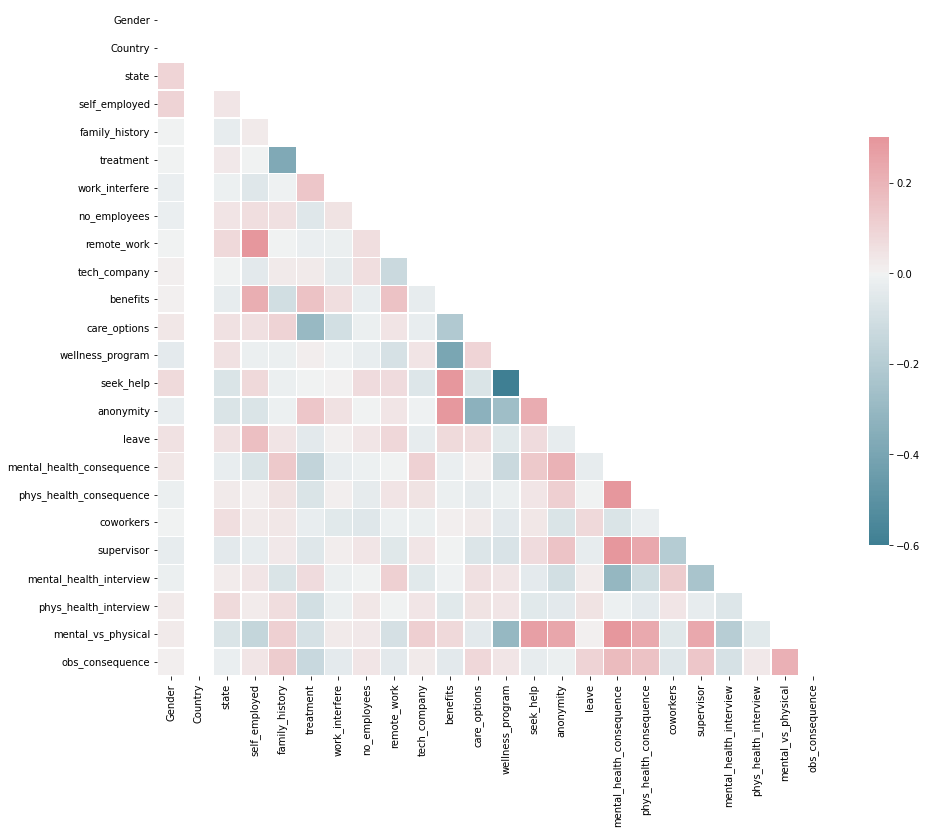

In [ ]:
corr = data_encoding.corr(method ='spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

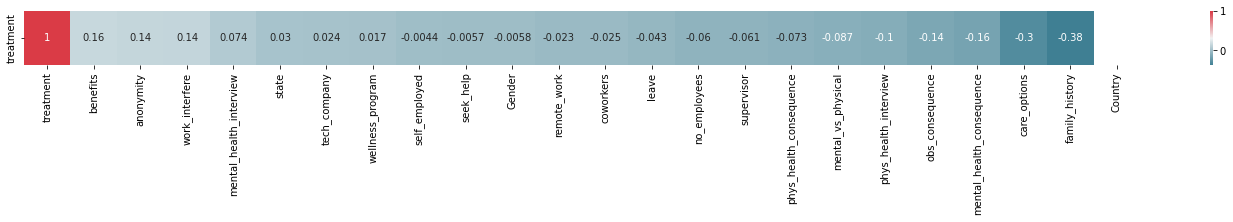

In [ ]:
f, ax = plt.subplots(figsize=(25, 1))
treatment = corr.sort_values(by=['treatment'], ascending=False).head(1).T
treatment = treatment.sort_values(by=['treatment'],ascending=False).T
sns.heatmap(treatment, cmap=cmap, annot=True)
plt.show()

**from correlation heat map we select treatment as our target value, beacuse it has a perfect correlation (strong indication for mental illness)**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

features_norm = MinMaxScaler().fit_transform(data_encoding.drop(['treatment'], axis=1))
chi_selector = SelectKBest(chi2, k=10)
chi_selector.fit(features_norm, data_encoding.treatment)

chi_support = chi_selector.get_support()
chi_feature = data_encoding.drop(['treatment'], axis=1).loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

10 selected features


In [ ]:
print('Top-10 features: \n', chi_feature)

Top-10 features: 
 ['family_history', 'work_interfere', 'benefits', 'care_options', 'anonymity', 'mental_health_consequence', 'phys_health_consequence', 'mental_health_interview', 'phys_health_interview', 'obs_consequence']


In [ ]:
us.Gender.unique()

array(['Female', 'M', 'Male', 'female', 'male', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'Cis Male', 'm', 'f',
       'Male (CIS)', 'queer/she/they', 'non-binary', 'Femake', 'woman',
       'Make', 'Nah', 'Genderqueer', 'Female ', 'Woman',
       'cis-female/femme', 'Male ', 'Trans woman', 'Man', 'msle',
       'Female (trans)', 'Female (cis)', 'Mail', 'cis male', 'p',
       'femail'], dtype=object)

In [ ]:
us.Gender.replace(['Male (CIS)','cis male'],'Cis Male',inplace=True)
us.Gender.replace(['Female (cis)','cis-female/femme'],'Cis Female',inplace=True)
us.Gender.replace(['queer/she/they','Genderqueer','Male-ish'],'non-binary',inplace=True)
us.Gender.replace(['Female (trans)','Trans woman'],'Trans-female',inplace=True)
us.Gender.replace(['M','male','maile','m','Make','Male ','Man','msle','Mail','Cis Male'],'Male',inplace=True)
us.Gender.replace(['female','F','f','Femake','woman','Woman','Female ','femail','Cis Female'],'Female',inplace=True)
us.Gender.replace(['Nah','p'],str(us.Gender.mode()[0]),inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
us.obs_consequence

0       No
1       No
4       No
5       No
6       No
        ..
1253    No
1255    No
1256    No
1257    No
1258    No
Name: obs_consequence, Length: 751, dtype: object

In [ ]:
Gender = us.Gender
Gender = pd.get_dummies(Gender)
state = us.state
state = pd.get_dummies(state)
self_employed = us.self_employed
self_employed = pd.get_dummies(self_employed)
family_history = us.family_history
family_history = pd.get_dummies(family_history)
work_interfere = us.work_interfere
work_interfere = pd.get_dummies(work_interfere)
no_employees = us.no_employees
no_employees = pd.get_dummies(no_employees)
remote_work = us.remote_work
remote_work = pd.get_dummies(remote_work)
tech_company = us.tech_company
tech_company = pd.get_dummies(tech_company)
benefits = us.benefits
benefits = pd.get_dummies(benefits)
care_options = us.care_options
care_options = pd.get_dummies(care_options)
wellness_program = us.wellness_program
wellness_program = pd.get_dummies(wellness_program)
anonymity = us.anonymity
anonymity = pd.get_dummies(anonymity)
leave = us.leave
leave = pd.get_dummies(leave)
mental_health_consequence = us.mental_health_consequence
mental_health_consequence = pd.get_dummies(mental_health_consequence)
phys_health_consequence = us.phys_health_consequence
phys_health_consequence = pd.get_dummies(phys_health_consequence)
coworkers = us.coworkers
coworkers = pd.get_dummies(coworkers)
supervisor = us.supervisor
supervisor = pd.get_dummies(supervisor)
mental_health_interview = us.mental_health_interview
mental_health_interview = pd.get_dummies(mental_health_interview)
phys_health_interview = us.phys_health_interview
phys_health_interview = pd.get_dummies(phys_health_interview)
mental_vs_physical = us.mental_vs_physical
mental_vs_physical = pd.get_dummies(mental_vs_physical)
obs_consequence = us.obs_consequence
obs_consequence = pd.get_dummies(obs_consequence)

In [ ]:
us = us[['treatment','Age']]

In [ ]:
us = pd.concat([us,Gender], axis = 'columns')
us = pd.concat([us,state], axis = 'columns')
us = pd.concat([us,self_employed], axis = 'columns')
us = pd.concat([us,family_history], axis = 'columns')
us = pd.concat([us,work_interfere], axis = 'columns')
us = pd.concat([us,no_employees], axis = 'columns')
us = pd.concat([us,remote_work], axis = 'columns')
us = pd.concat([us,tech_company], axis = 'columns')
us = pd.concat([us,benefits], axis = 'columns')
us = pd.concat([us,care_options], axis = 'columns')
us = pd.concat([us,wellness_program], axis = 'columns')
us = pd.concat([us,anonymity], axis = 'columns')
us = pd.concat([us,leave], axis = 'columns')
us = pd.concat([us,mental_health_consequence], axis = 'columns')
us = pd.concat([us,phys_health_consequence], axis = 'columns')
us = pd.concat([us,coworkers], axis = 'columns')
us = pd.concat([us,supervisor], axis = 'columns')
us = pd.concat([us,mental_health_interview], axis = 'columns')
us = pd.concat([us,phys_health_interview], axis = 'columns')
us = pd.concat([us,mental_vs_physical], axis = 'columns')
us = pd.concat([us,obs_consequence], axis = 'columns')

In [ ]:
us

,treatment,Age,Female,Male,Trans-female,non-binary,AL,AZ,CA,CO,...,No,Yes,Maybe,No,Yes,Don't know,No,Yes,No,Yes
0,Yes,37,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
1,No,44,0,1,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
4,No,31,0,1,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,1,0
5,No,33,0,1,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0
6,Yes,35,1,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,No,36,0,1,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
1255,Yes,32,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0
1256,Yes,34,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0
1257,No,46,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0


In [ ]:
us.treatment = us.treatment.replace(['Yes','No'],[1,0])

In [ ]:
us

,treatment,Age,Female,Male,Trans-female,non-binary,AL,AZ,CA,CO,...,No,Yes,Maybe,No,Yes,Don't know,No,Yes,No,Yes
0,1,37,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
1,0,44,0,1,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
4,0,31,0,1,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,1,0
5,0,33,0,1,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0
6,1,35,1,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,0,36,0,1,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
1255,1,32,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0
1256,1,34,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0
1257,0,46,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0


# Machine Learning

In [ ]:
# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, plot_roc_curve, precision_score,f1_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

In [ ]:
y = np.array(us['treatment'])
x = np.array(us.iloc[:,1:])

In [ ]:
Xtr, Xts, ytr, yts = train_test_split(x, y, test_size= .33)

In [ ]:
logreg = LogisticRegression()
tree = DecisionTreeClassifier(random_state = 2222)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state = 2222)
ada = AdaBoostClassifier(random_state = 2222)
grad = GradientBoostingClassifier(random_state = 2222)
xgboost = XGBClassifier(random_state = 2222)

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('LogisticRegression', logreg)])


pipe.fit(Xtr, ytr)
Pipeline(steps=[('scaler', StandardScaler()), ('LogisticRegression', logreg)])
pipe.score(Xts, yts)

0.7983870967741935

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

In [ ]:
logreg_pipe = Pipeline([('scaler', StandardScaler()), ('logreg', logreg)])
tree_pipe = Pipeline([('scaler', StandardScaler()), ('tree', tree)])
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', knn)])
rf_pipe = Pipeline([('scaler', StandardScaler()), ('rf', rf)])
ada_pipe = Pipeline([('scaler', StandardScaler()), ('ada', ada)])
grad_pipe = Pipeline([('scaler', StandardScaler()), ('grad', grad)])
xgb_pipe = Pipeline([('scaler', StandardScaler()), ('xgboost', xgboost)])

def model_evaluation(model, metric):
    model_cv = cross_val_score(model, Xtr, ytr, cv = StratifiedKFold(n_splits = 5), scoring = metric)
    return model_cv

logreg_pipe_cv = model_evaluation(logreg_pipe, 'recall')
tree_pipe_cv = model_evaluation(tree_pipe, 'recall')
knn_pipe_cv = model_evaluation(knn_pipe, 'recall')
rf_pipe_cv = model_evaluation(rf_pipe, 'recall')
ada_pipe_cv = model_evaluation(ada_pipe, 'recall')
grad_pipe_cv = model_evaluation(grad_pipe, 'recall')
xgb_pipe_cv = model_evaluation(xgb_pipe, 'recall')

for model in [logreg_pipe, tree_pipe, knn_pipe, rf_pipe, ada_pipe, grad_pipe, xgb_pipe]:
    model.fit(Xtr, ytr)

# score_cv = [logreg_pipe_cv.round(5), tree_pipe_cv.round(5), knn_pipe_cv.round(5),
#             rf_pipe_cv.round(5), ada_pipe_cv.round(5), grad_pipe_cv.round(5), xgb_pipe_cv.round(5)]
# precision_score = [logreg_pipe_cv.mean(), tree_pipe_cv.mean(), knn_pipe_cv.mean(), rf_pipe_cv.mean(),
#               ada_pipe_cv.mean(), grad_pipe_cv.mean(), xgb_pipe_cv.mean()]
# score_std = [logreg_pipe_cv.std(), tree_pipe_cv.std(), knn_pipe_cv.std(), rf_pipe_cv.std(),
#              ada_pipe_cv.std(), grad_pipe_cv.std(), xgb_pipe_cv.std()]
score_recall_score = [recall_score(yts, logreg_pipe.predict(Xts)),
            recall_score(yts, tree_pipe.predict(Xts)), 
            recall_score(yts, knn_pipe.predict(Xts)), 
            recall_score(yts, rf_pipe.predict(Xts)),
            recall_score(yts, ada_pipe.predict(Xts)),
            recall_score(yts, grad_pipe.predict(Xts)),
            recall_score(yts, xgb_pipe.predict(Xts))]
score_precision_score = [precision_score(yts, logreg_pipe.predict(Xts)),
            precision_score(yts, tree_pipe.predict(Xts)), 
            precision_score(yts, knn_pipe.predict(Xts)), 
            precision_score(yts, rf_pipe.predict(Xts)),
            precision_score(yts, ada_pipe.predict(Xts)),
            precision_score(yts, grad_pipe.predict(Xts)),
            precision_score(yts, xgb_pipe.predict(Xts))]
score_f1_score = [f1_score(yts, logreg_pipe.predict(Xts)),
            f1_score(yts, tree_pipe.predict(Xts)), 
            f1_score(yts, knn_pipe.predict(Xts)), 
            f1_score(yts, rf_pipe.predict(Xts)),
            f1_score(yts, ada_pipe.predict(Xts)),
            f1_score(yts, grad_pipe.predict(Xts)),
            f1_score(yts, xgb_pipe.predict(Xts))]
score_accuracy_score = [accuracy_score(yts, logreg_pipe.predict(Xts)),
            accuracy_score(yts, tree_pipe.predict(Xts)), 
            accuracy_score(yts, knn_pipe.predict(Xts)), 
            accuracy_score(yts, rf_pipe.predict(Xts)),
            accuracy_score(yts, ada_pipe.predict(Xts)),
            accuracy_score(yts, grad_pipe.predict(Xts)),
            accuracy_score(yts, xgb_pipe.predict(Xts))]
method_name = ['Logistic Regression', 'Decision Tree Classifier', 'KNN Classifier', 'Random Forest Classifier',
               'Ada Boost Classifier', 'Gradient Boosting Classifier', 'XGB Classifier']
cv_summary = pd.DataFrame({
    'method': method_name,
    'f1 score': score_f1_score,
    'accuracy_score': score_accuracy_score,
    'precision score': score_precision_score,
    'recall score': score_recall_score
})
cv_summary

,method,f1 score,accuracy_score,precision score,recall score
0,Logistic Regression,0.828767,0.798387,0.812081,0.846154
1,Decision Tree Classifier,0.726027,0.677419,0.711409,0.741259
2,KNN Classifier,0.693141,0.657258,0.716418,0.671329
3,Random Forest Classifier,0.823129,0.790323,0.801325,0.846154
4,Ada Boost Classifier,0.812287,0.778226,0.793333,0.832168
5,Gradient Boosting Classifier,0.814815,0.778226,0.785714,0.846154
6,XGB Classifier,0.820000,0.782258,0.783439,0.860140


# Natural Language Processing

In [ ]:
abstracts_list = comm['comments'].values.tolist()

In [ ]:
stemmer = SnowballStemmer("english")

In [ ]:
translator = str.maketrans(string.punctuation, ' ' * len(string.punctuation))

In [ ]:
string.punctuation

In [ ]:
abstracts_list[0].split()[:10]

In [ ]:
def tokenize(text):
    translator = str.maketrans(string.punctuation, ' ' * len(string.punctuation))  # translator that replaces punctuation with empty spaces
    return [stemmer.stem(i) for i in text.translate(translator).split()]  # stemmer and tokenizing into words

In [ ]:
tokenize(abstracts_list[0])[:20]

**extract bag of words**

In [ ]:
vectorizer = CountVectorizer(analyzer="word",        # unit of features are single words rather than characters
                            tokenizer=tokenize,      # function to create tokens
                            ngram_range=(0,1),       # unigrams - single words
                            strip_accents='unicode', # remove accent characters
                            min_df = 0.05,           # only include words with minimum frequency of 0.05
                            max_df = 0.95)           # only include words with maximum frequency of 0.95

In [ ]:
bag_of_words = vectorizer.fit_transform(abstracts_list)  # transform our corpus as a bag of words
features = vectorizer.get_feature_names_out()

In [ ]:
bag_of_words_df = pd.DataFrame(bag_of_words.todense(), columns=features)

In [ ]:
bag_of_words_df

In [ ]:
lda = LatentDirichletAllocation(learning_method='online')

doctopic = lda.fit_transform(bag_of_words)

In [ ]:
ls_keywords = []
for i,topic in enumerate(lda.components_):  # lda.components_ represent topics
    word_idx = np.argsort(topic)[::-1][:5]
    keywords = ', '.join(features[i] for i in word_idx)
    ls_keywords.append(keywords)
    print(i, keywords)

**remove stop word**

In [ ]:
# We download stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

In [ ]:
# Set the correct stop words
stop_words = set(stopwords.words('english'))

In [ ]:
# Tokenize stop words to match 
stop_words = [tokenize(s)[0] for s in stop_words]

In [ ]:
# Create Vectorizer
vectorizer = CountVectorizer(analyzer="word",           # unit of features are single words rather than characters
                            tokenizer=tokenize,         # function to create tokens
                            ngram_range=(0,1),          # unigrams - single words
                            strip_accents='unicode',    # remove accent characters
                            stop_words = stop_words,    # remove stopwords
                            min_df = 0.05,              # only include words with minimum frequency of 0.05
                            max_df = 0.95)              # only include words with maximum frequency of 0.95

# Creating bag of words
bag_of_words = vectorizer.fit_transform(abstracts_list) # transform our corpus as a bag of words
features = vectorizer.get_feature_names_out()               # get features (words)

#we will try 10 topics instead
lda = LatentDirichletAllocation(n_components = 10, learning_method='online')
doctopic = lda.fit_transform(bag_of_words)

# Displaying the top keywords in each topic
ls_keywords = []
for i,topic in enumerate(lda.components_):
    word_idx = np.argsort(topic)[::-1][:5]
    keywords = ', '.join(features[i] for i in word_idx)
    ls_keywords.append(keywords)
    print(i, keywords)

In [ ]:
vectorizer = CountVectorizer(analyzer="word",           # unit of features are single words rather than characters
                            tokenizer=tokenize,         # function to create tokens
                            ngram_range=(0,2),          # allow for bigrams
                            strip_accents='unicode',    # remove accent characters
                            stop_words = stop_words,    # remove stopwords
                            min_df = 0.05,              # only include words with minimum frequency of 0.05
                            max_df = 0.95)              # only include words with maximum frequency of 0.95

In [ ]:
#add additional stop word
stop = stop_words + ['provid', 'use', 'studi', 'et', 'al', 'research', 'program', 'scienc', 'univers', 'e g', 'mentor', 
                    'institut', 'dr', 'train']
full_stopwords = [tokenize(s)[0] for s in stop]

**revise tokenizer**

In [ ]:
vectorizer = CountVectorizer(analyzer="word",            # unit of features are single words rather than characters
                            tokenizer=tokenize,          # function to create tokens
                            ngram_range=(0,2),           # allow for bigrams
                            strip_accents='unicode',     # remove accent characters
                            stop_words = full_stopwords, # remove stopwords
                            min_df = 0.05,               # only include words with minimum frequency of 0.05
                            max_df = 0.95)               # only include words with maximum frequency of 0.95

# Creating bag of words
bag_of_words = vectorizer.fit_transform(abstracts_list)  # transform our corpus as a bag of words
features = vectorizer.get_feature_names_out()                # get features (words)

# Use TfidfTransformer to re-weight bag of words
transformer = TfidfTransformer(norm = None, smooth_idf = True, sublinear_tf = True)
tfidf = transformer.fit_transform(bag_of_words)

# Fitting LDA model with 5 components
lda = LatentDirichletAllocation(n_components = 5, learning_method='online')
doctopic_all = lda.fit_transform(tfidf)

# Displaying the top keywords in each topic
ls_keywords = []
for i,topic in enumerate(lda.components_):
    word_idx = np.argsort(topic)[::-1][:15]
    keywords = ', '.join(features[i] for i in word_idx)
    ls_keywords.append(keywords)
    print(i, keywords)

In [ ]:
topics_doc = pd.DataFrame(doctopic_all, columns = ls_keywords)

In [ ]:
doc_topics_project_id = pd.concat([topics_doc,us],axis=1)

In [ ]:
from collections import Counter
topic_count = Counter(topics_doc.idxmax(axis=1))
topic_count.most_common()

In [ ]:
lst = []
for k,v in topic_count.items():
  lst.append(k)

In [ ]:
newlist = []
for word in lst:
    word = word.split(",")
    newlist.append(word)

In [ ]:
lst2 = pd.DataFrame(newlist).values

In [ ]:
flat_list = [item for sublist in lst2 for item in sublist]

In [ ]:
OrderedDict(Counter(flat_list).most_common())